This is a basic linear regression model with one variable.
The model is trained without using libraries and there is no testing and training split

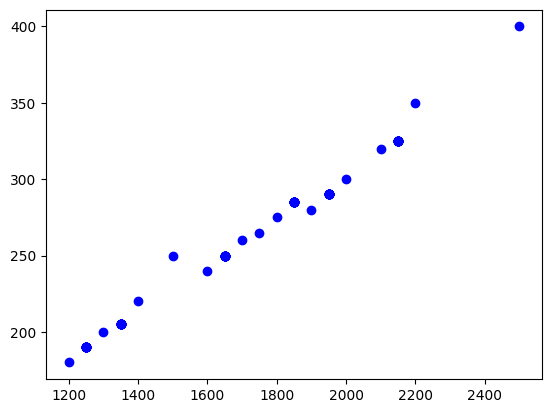

In [66]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([
    1500, 2000, 1800, 1200, 2200, 1700, 1400, 2500, 1600, 1900, 1300, 2100, 1750, 1350,
    2150, 1850, 1250, 1650, 1950, 1350, 2150, 1850, 1250, 1650, 1950, 1350, 2150, 1850,
    1250, 1650, 1950, 1350, 2150, 1850, 1250, 1650, 1950, 1350, 2150, 1850, 1250, 1650,
    1950, 1350, 2150, 1850, 1250, 1650, 1950, 1350, 2150, 1850, 1250, 1650, 1950, 1350,
    2150, 1850, 1250, 1650, 1950, 1350, 2150, 1850, 1250, 1650, 1950, 1350, 2150, 1850,
    1250, 1650, 1950, 1350, 2150, 1850, 1250, 1650, 1950, 1350, 2150, 1850, 1250, 1650,
    1950, 1350, 2150, 1850, 1250, 1650, 1950, 1350, 2150, 1850, 1250, 1650, 1950, 1350,
    2150, 1850, 1250, 1650, 1950, 1350, 2150
])
y = np.array([
    250000, 300000, 275000, 180000, 350000, 260000, 220000, 400000, 240000, 280000,
    200000, 320000, 265000, 205000, 325000, 285000, 190000, 250000, 290000, 205000,
    325000, 285000, 190000, 250000, 290000, 205000, 325000, 285000, 190000, 250000,
    290000, 205000, 325000, 285000, 190000, 250000, 290000, 205000, 325000, 285000,
    190000, 250000, 290000, 205000, 325000, 285000, 190000, 250000, 290000, 205000,
    325000, 285000, 190000, 250000, 290000, 205000, 325000, 285000, 190000, 250000,
    290000, 205000, 325000, 285000, 190000, 250000, 290000, 205000, 325000, 285000,
    190000, 250000, 290000, 205000, 325000, 285000, 190000, 250000, 290000, 205000,
    325000, 285000, 190000, 250000, 290000, 205000, 325000, 285000, 190000, 250000,
    290000, 205000, 325000, 285000, 190000, 250000, 290000, 205000, 325000, 285000,
    190000, 250000, 290000, 205000, 325000
])
y = y/1000
plt.scatter(X,y,color='b')

In [67]:
#normalising the data to prevent overflowing
X_min = X.min()
X_max = X.max()
y_min = y.min()
y_max = y.max()
X = (X - X_min) / (X_max - X_min)
y = (y - y_min) / (y_max - y_min)

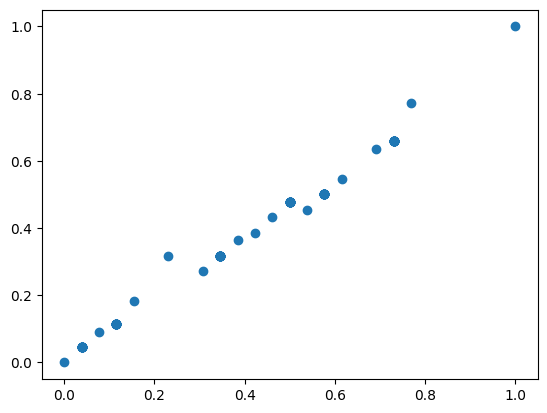

In [68]:
plt.scatter(X,y)

In [69]:
#initialising parameters to 0
w = 0.
b = 0.

In [70]:
#creating a function for calculating cost
def cost_function(X,y,w,b):
    m = X.shape[0]
    cost = 0
    for i in range(m):
      f = (w*X[i]) + b
      cost += (f - y[i])**2

    cost /= (2*m)
    return cost

In [71]:
#function for finding derivates in gradient descent (dj_db, dj_dw)
def derive(X,y,w,b):
  m = X.shape[0]
  dj_db = 0
  dj_dw = 0
  for i in range(m):
    f = (w*X[i])+b
    dj_dw += (f-y[i])*X[i]
    dj_db += (f-y[i])

  dj_db /= m
  dj_dw /= m

  return dj_dw, dj_db

In [72]:
#lets create a function for gradient descent now
def gradient_descent(X,y,w,b,alpha,iterations):
  costs = []
  for i in range(iterations):
    dj_dw, dj_db = derive(X,y,w,b)
    #update parameters
    w = w - (alpha*dj_dw)
    b = b - (alpha*dj_db)


    if i % 100 == 0:
      cost = cost_function(X, y, w, b)
      costs.append(cost)
      print(f"Iteration {i}: Cost {cost}")

  return w, b, costs


Iteration 0: Cost 0.089095509003464
Iteration 100: Cost 0.023484271473891045
Iteration 200: Cost 0.015628350039517028
Iteration 300: Cost 0.013504792633968572
Iteration 400: Cost 0.012076069055653164
Iteration 500: Cost 0.010841289818956113
Iteration 600: Cost 0.00973895500832354
Iteration 700: Cost 0.008751337668548248
Iteration 800: Cost 0.007866158234684582
Iteration 900: Cost 0.007072758671067589
Iteration 1000: Cost 0.006361619597777218
Iteration 1100: Cost 0.005724211854872226
Iteration 1200: Cost 0.0051528909036814025
Iteration 1300: Cost 0.004640804825773977
Iteration 1400: Cost 0.004181812116338609
Iteration 1500: Cost 0.0037704080254690494
Iteration 1600: Cost 0.0034016585388081566
Iteration 1700: Cost 0.003071141203345173
Iteration 1800: Cost 0.0027748920884494164
Iteration 1900: Cost 0.00250935824601545
Iteration 2000: Cost 0.002271355099567044
Iteration 2100: Cost 0.0020580282512824197
Iteration 2200: Cost 0.0018668192488883423
Iteration 2300: Cost 0.0016954349018615832
It

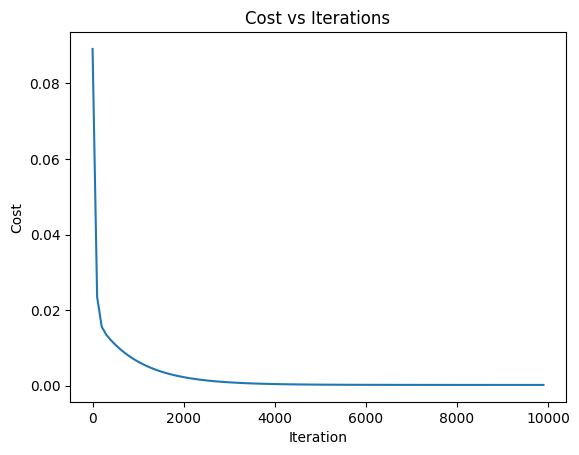

Final weights: 0.8891592188632991
Final bias: 0.013154895032959302


In [73]:
alpha = 0.01
iterations = 10000

w, b, costs = gradient_descent(X, y, w, b, alpha, iterations)

# Plotting the cost over iterations
plt.plot(range(0, iterations, 100), costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

print("Final weights:", w)
print("Final bias:", b)

Now we have trained our model so lets try to predict a house price


In [76]:
x_predict = 1250
x_predict = (x_predict - X_min) / (X_max - X_min)
prediction = w * x_predict + b
prediction = prediction * (y_max - y_min) + y_min
prediction *= 1000
print(prediction)

190417.73183609435
